In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set(style='whitegrid')

%matplotlib inline

In [61]:
df = pd.read_csv("results-server-final.csv")
df

df["loss_history"] = df["history"].map(lambda row: json.loads(row.replace('\'', '"'))["loss"])
df["loss_history_zip"] = df["loss_history"].map(lambda hist: list(zip(hist, list(range(len(hist))))))
df = df.explode('loss_history_zip', ignore_index=True)
df["loss_step"] = df["loss_history_zip"].map(lambda x: x[1])
df["loss_value"] = df["loss_history_zip"].map(lambda x: x[0])
df

,Unnamed: 0,learning_rate,noise_multiplier,l2_norm_clip,batch_size,epochs,num_microbatches,n,test_metrics,history,cardinality,eps,delta,loss_history,loss_history_zip,loss_step,loss_value
0,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.3058583736419678, 0)",0,2.305858
1,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.306053876876831, 1)",1,2.306054
2,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.3067102432250977, 2)",2,2.306710
3,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.306849718093872, 3)",3,2.306850
4,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.308643102645874, 4)",4,2.308643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.1899261325597763, 5)",5,0.189926
4196,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.15028025209903717, 6)",6,0.150280
4197,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.12595270574092865, 7)",7,0.125953
4198,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.1025216206908226, 8)",8,0.102522


In [34]:
noise_multiplier = 1.0
l2_norm_clip = 5.0
batch_size = 10
epochs = 10
num_microbatches = 1  # 256 error
n = 1000
delta = 1.0 / n


df = df[df["epochs"] == epochs]
df = df[df["noise_multiplier"] == noise_multiplier]
df = df[df["l2_norm_clip"] == l2_norm_clip]
df = df[df["num_microbatches"] == num_microbatches]
df = df[df["delta"] == delta]
df

,Unnamed: 0,learning_rate,noise_multiplier,l2_norm_clip,batch_size,epochs,num_microbatches,n,test_metrics,history,cardinality,eps,delta
204,204,0.25,1.0,5.0,10,10,1,100,cardinality=10000 metrics={'loss': 2.298559188...,"{'loss': [2.3089163303375244, 2.30581688880920...",100,5.670336,0.001
205,205,0.25,1.0,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.295351982...,"{'loss': [2.3010404109954834, 2.30357313156127...",500,2.137294,0.001
206,206,0.25,1.0,5.0,10,10,1,1000,cardinality=10000 metrics={'loss': 2.267557144...,"{'loss': [2.309359073638916, 2.308909654617309...",1000,1.386470,0.001


,Unnamed: 0,learning_rate,noise_multiplier,l2_norm_clip,batch_size,epochs,num_microbatches,n,test_metrics,history,cardinality,eps,delta,loss_history,loss_history_zip,loss_step,loss_value
0,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.3058583736419678, 0)",0,2.305858
1,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.306053876876831, 1)",1,2.306054
2,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.3067102432250977, 2)",2,2.306710
3,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.306849718093872, 3)",3,2.306850
4,0,0.25,10.00,0.1,10,10,1,100,cardinality=10000 metrics={'loss': 2.308907985...,"{'loss': [2.3058583736419678, 2.30605387687683...",100,2.400186e-01,0.001000,"[2.3058583736419678, 2.306053876876831, 2.3067...","(2.308643102645874, 4)",4,2.308643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.1899261325597763, 5)",5,0.189926
4196,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.15028025209903717, 6)",6,0.150280
4197,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.12595270574092865, 7)",7,0.125953
4198,419,0.25,0.01,20.0,10,10,5,1000,cardinality=10000 metrics={'loss': 0.230380505...,"{'loss': [1.970666766166687, 0.680620789527893...",1000,6.227002e+06,0.000501,"[1.970666766166687, 0.6806207895278931, 0.4299...","(0.1025216206908226, 8)",8,0.102522


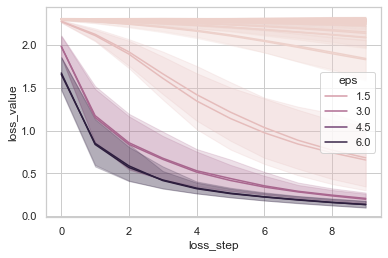

In [57]:
fig, ax = plt.subplots()
sns.lineplot(x="loss_step", y="loss_value", hue="eps", data=df, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("eps.jpg", dpi=200)


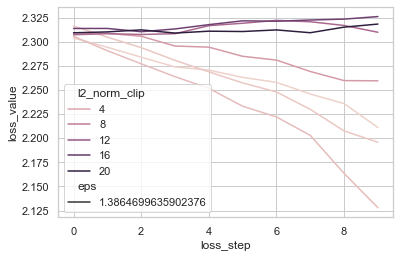

In [70]:
noise_multiplier = 1.0
l2_norm_clip = 5.0
batch_size = 10
epochs = 10
num_microbatches = 1  # 256 error
n = 1000
delta = 1.0 / n

df1 = df
df1 = df1[df1["epochs"] == epochs]
df1 = df1[df1["noise_multiplier"] == noise_multiplier]
#df1 = df1[df1["l2_norm_clip"] == l2_norm_clip]
df1 = df1[df1["eps"] < 1.5]
df1 = df1[df1["num_microbatches"] == num_microbatches]
df1 = df1[df1["delta"] == delta]
df1

fig, ax = plt.subplots()
sns.lineplot(x="loss_step", y="loss_value", hue="l2_norm_clip", style="eps", data=df1, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("l2-clip.jpg", dpi=200)

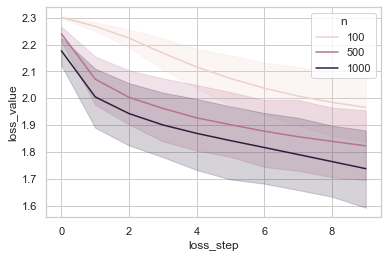

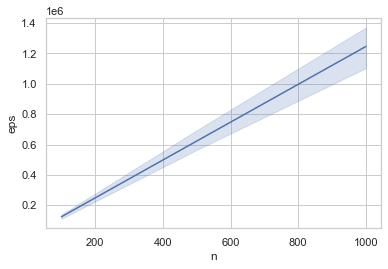

In [88]:
noise_multiplier = 1.0
l2_norm_clip = 8
batch_size = 10
epochs = 10
num_microbatches = 1  # 256 error
#delta = 1.0 / n

df2 = df
df2 = df2[df2["epochs"] == epochs]
df2 = df2[df2["noise_multiplier"] == noise_multiplier]
 #df2 = df2[df2["l2_norm_clip"] == 2.0]
#df2 = df2[df2["eps"] < 1.5]
#df2 = df2[df2["num_microbatches"] == num_microbatches]
#df2 = df2[df2["delta"] == delta]

fig, ax = plt.subplots()
sns.lineplot(x="loss_step", y="loss_value", hue="n", data=df2, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("n.jpg", dpi=200)

fig, ax = plt.subplots()
sns.lineplot(x="n", y="eps", data=df2, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("n-eps.jpg", dpi=200)

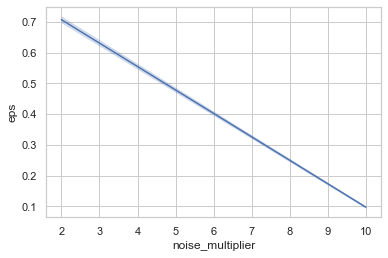

In [96]:
noise_multiplier = 1.0
l2_norm_clip = 5.0
batch_size = 10
epochs = 10
num_microbatches = 1  # 256 error
n=500
#delta = 1.0 / n

df3 = df
df3 = df3[df3["epochs"] == epochs]
df3 = df3[df3["noise_multiplier"] > noise_multiplier]
df3 = df3[df3["l2_norm_clip"] == l2_norm_clip]
df3 = df3[df3["n"] == n]
df3

fig, ax = plt.subplots()
sns.lineplot(x="noise_multiplier", y="eps", data=df3, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("noise-eps.jpg", dpi=200)

In [95]:
df3

,Unnamed: 0,learning_rate,noise_multiplier,l2_norm_clip,batch_size,epochs,num_microbatches,n,test_metrics,history,cardinality,eps,delta,loss_history,loss_history_zip,loss_step,loss_value
370,37,0.25,10.00,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.304121017...,"{'loss': [2.304597854614258, 2.307464599609375...",500,9.121521e-02,0.001000,"[2.304597854614258, 2.307464599609375, 2.30611...","(2.304597854614258, 0)",0,2.304598
371,37,0.25,10.00,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.304121017...,"{'loss': [2.304597854614258, 2.307464599609375...",500,9.121521e-02,0.001000,"[2.304597854614258, 2.307464599609375, 2.30611...","(2.307464599609375, 1)",1,2.307465
372,37,0.25,10.00,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.304121017...,"{'loss': [2.304597854614258, 2.307464599609375...",500,9.121521e-02,0.001000,"[2.304597854614258, 2.307464599609375, 2.30611...","(2.3061134815216064, 2)",2,2.306113
373,37,0.25,10.00,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.304121017...,"{'loss': [2.304597854614258, 2.307464599609375...",500,9.121521e-02,0.001000,"[2.304597854614258, 2.307464599609375, 2.30611...","(2.3012142181396484, 3)",3,2.301214
374,37,0.25,10.00,5.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.304121017...,"{'loss': [2.304597854614258, 2.307464599609375...",500,9.121521e-02,0.001000,"[2.304597854614258, 2.307464599609375, 2.30611...","(2.306041955947876, 4)",4,2.306042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,382,0.25,0.01,5.0,10,10,5,500,cardinality=10000 metrics={'loss': 0.411854684...,"{'loss': [1.7781201601028442, 0.60670012235641...",500,3.115248e+06,0.000501,"[1.7781201601028442, 0.6067001223564148, 0.454...","(0.24593140184879303, 5)",5,0.245931
3826,382,0.25,0.01,5.0,10,10,5,500,cardinality=10000 metrics={'loss': 0.411854684...,"{'loss': [1.7781201601028442, 0.60670012235641...",500,3.115248e+06,0.000501,"[1.7781201601028442, 0.6067001223564148, 0.454...","(0.2085440456867218, 6)",6,0.208544
3827,382,0.25,0.01,5.0,10,10,5,500,cardinality=10000 metrics={'loss': 0.411854684...,"{'loss': [1.7781201601028442, 0.60670012235641...",500,3.115248e+06,0.000501,"[1.7781201601028442, 0.6067001223564148, 0.454...","(0.17625588178634644, 7)",7,0.176256
3828,382,0.25,0.01,5.0,10,10,5,500,cardinality=10000 metrics={'loss': 0.411854684...,"{'loss': [1.7781201601028442, 0.60670012235641...",500,3.115248e+06,0.000501,"[1.7781201601028442, 0.6067001223564148, 0.454...","(0.14487028121948242, 8)",8,0.144870


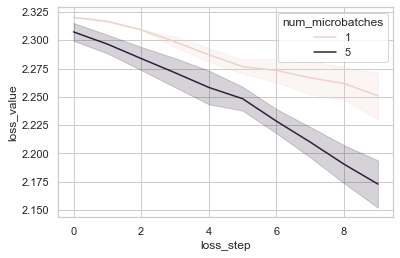

In [99]:
noise_multiplier = 1.0
l2_norm_clip = 2.0
batch_size = 10
epochs = 10
num_microbatches = 1  # 256 error
n=500
#delta = 1.0 / n

df4 = df
df4 = df4[df4["epochs"] == epochs]
df4 = df4[df4["noise_multiplier"] == noise_multiplier]
df4 = df4[df4["l2_norm_clip"] == l2_norm_clip]
df4 = df4[df4["n"] == n]
df4

fig, ax = plt.subplots()
sns.lineplot(x="loss_step", y="loss_value", hue="num_microbatches", data=df4, ax=ax)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig("microbatches.jpg", dpi=200)

In [98]:
df4

,Unnamed: 0,learning_rate,noise_multiplier,l2_norm_clip,batch_size,epochs,num_microbatches,n,test_metrics,history,cardinality,eps,delta,loss_history,loss_history_zip,loss_step,loss_value
250,25,0.25,10.0,2.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.301604032...,"{'loss': [2.297842264175415, 2.300409078598022...",500,0.091215,0.001000,"[2.297842264175415, 2.3004090785980225, 2.2965...","(2.297842264175415, 0)",0,2.297842
251,25,0.25,10.0,2.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.301604032...,"{'loss': [2.297842264175415, 2.300409078598022...",500,0.091215,0.001000,"[2.297842264175415, 2.3004090785980225, 2.2965...","(2.3004090785980225, 1)",1,2.300409
252,25,0.25,10.0,2.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.301604032...,"{'loss': [2.297842264175415, 2.300409078598022...",500,0.091215,0.001000,"[2.297842264175415, 2.3004090785980225, 2.2965...","(2.2965009212493896, 2)",2,2.296501
253,25,0.25,10.0,2.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.301604032...,"{'loss': [2.297842264175415, 2.300409078598022...",500,0.091215,0.001000,"[2.297842264175415, 2.3004090785980225, 2.2965...","(2.2958569526672363, 3)",3,2.295857
254,25,0.25,10.0,2.0,10,10,1,500,cardinality=10000 metrics={'loss': 2.301604032...,"{'loss': [2.297842264175415, 2.300409078598022...",500,0.091215,0.001000,"[2.297842264175415, 2.3004090785980225, 2.2965...","(2.2957701683044434, 4)",4,2.295770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,118,0.25,2.0,2.0,10,10,5,500,cardinality=10000 metrics={'loss': 2.233346223...,"{'loss': [2.296703338623047, 2.284126996994018...",500,0.735846,0.000501,"[2.296703338623047, 2.2841269969940186, 2.2822...","(2.27108097076416, 5)",5,2.271081
1186,118,0.25,2.0,2.0,10,10,5,500,cardinality=10000 metrics={'loss': 2.233346223...,"{'loss': [2.296703338623047, 2.284126996994018...",500,0.735846,0.000501,"[2.296703338623047, 2.2841269969940186, 2.2822...","(2.2581145763397217, 6)",6,2.258115
1187,118,0.25,2.0,2.0,10,10,5,500,cardinality=10000 metrics={'loss': 2.233346223...,"{'loss': [2.296703338623047, 2.284126996994018...",500,0.735846,0.000501,"[2.296703338623047, 2.2841269969940186, 2.2822...","(2.2463483810424805, 7)",7,2.246348
1188,118,0.25,2.0,2.0,10,10,5,500,cardinality=10000 metrics={'loss': 2.233346223...,"{'loss': [2.296703338623047, 2.284126996994018...",500,0.735846,0.000501,"[2.296703338623047, 2.2841269969940186, 2.2822...","(2.232896327972412, 8)",8,2.232896
